In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import pandas as pd
import pandas as pd
#Punctuations
import string
#reg Expressions
import re
#emojis with description
import demoji
#sentences to words
from nltk.tokenize import TreebankWordTokenizer
#paras to sentences
from nltk.tokenize import sent_tokenize
#stopwords
from nltk.corpus import stopwords
#for converting word to vector
import gensim.models.word2vec as w2v

In [34]:
%%time
tweet_data = pd.read_csv("IRAhandle_tweets_1.csv")

Wall time: 2.03 s


In [35]:
#tweet_data

In [36]:
account_category_dict = {}

# classify that the article has recommends
for i in range(len(tweet_data)):
    if tweet_data["account_category"][i] in account_category_dict.keys():
        account_category_dict[tweet_data["account_category"][i]] += 1
    else:
        account_category_dict.setdefault(tweet_data["account_category"][i], 1)

In [37]:
account_category_dict

{'RightTroll': 114810,
 'NonEnglish': 53038,
 'Fearmonger': 384,
 'LeftTroll': 36072,
 'Unknown': 608,
 'HashtagGamer': 27349,
 'NewsFeed': 11291,
 'Commercial': 339}

In [38]:
# I'll want to visualize how many articles have in each topic. 
account_category_list = list(account_category_dict.items())
account_category_list.sort(key=lambda x: x[1], reverse=True)

In [39]:
x = []
y = []
for i in range(len(account_category_list)):
    x.append(account_category_list[i][0])
    y.append(account_category_list[i][1])

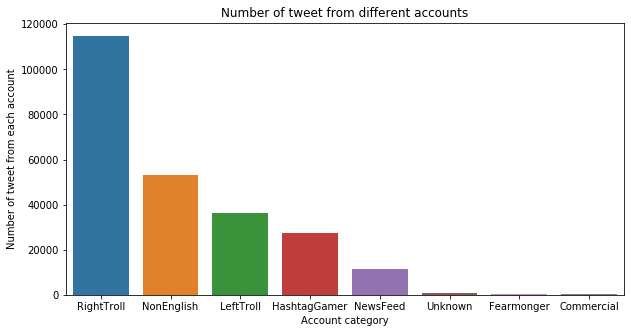

In [40]:
plt.figure(figsize=(10,5))
plt.title("Number of tweet from different accounts")
plt.xlabel("Account category")
plt.ylabel("Number of tweet from each account")
g=sns.barplot(x, y)
#for p in g.patches:
    #g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [41]:
#tweet_data.language.value_counts()

In [42]:
rightTroll_data = tweet_data[(tweet_data['account_category'] == 'RightTroll')]
leftTroll_data =  tweet_data[(tweet_data['account_category'] == 'LeftTroll')]

In [43]:
rightTroll_data['date'] = pd.to_datetime(rightTroll_data['publish_date'])
rightTroll_data['YEAR']=pd.to_datetime(rightTroll_data.date,format='%Y-%m-%d %H:%M:%S').dt.year
rightTroll_data['MONTH']=pd.to_datetime(rightTroll_data.date,format='%Y-%m-%d %H:%M:%S').dt.month
rightTroll_data['DAY']=pd.to_datetime(rightTroll_data.date,format='%Y-%m-%d %H:%M:%S').dt.day
leftTroll_data['date'] = pd.to_datetime(leftTroll_data['publish_date'])
leftTroll_data['YEAR']=pd.to_datetime(leftTroll_data.date,format='%Y-%m-%d %H:%M:%S').dt.year
leftTroll_data['MONTH']=pd.to_datetime(leftTroll_data.date,format='%Y-%m-%d %H:%M:%S').dt.month
leftTroll_data['DAY']=pd.to_datetime(leftTroll_data.date,format='%Y-%m-%d %H:%M:%S').dt.day

C:\Users\Mona\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mona\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mona\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [61]:
chron=pd.DataFrame(rightTroll_data.groupby(['YEAR','MONTH']).count()).reset_index().rename(columns={'content':'Total Tweet'})[['YEAR','MONTH','Total Tweet']]
chron=chron.pivot('MONTH','YEAR','Total Tweet')
chron1=pd.DataFrame(leftTroll_data.groupby(['YEAR','MONTH']).count()).reset_index().rename(columns={'content':'Total Tweet'})[['YEAR','MONTH','Total Tweet']]
chron1=chron1.pivot('MONTH','YEAR','Total Tweet')
#rightTroll_data2017 = rightTroll_data[(rightTroll_data['YEAR'] == '2017')]

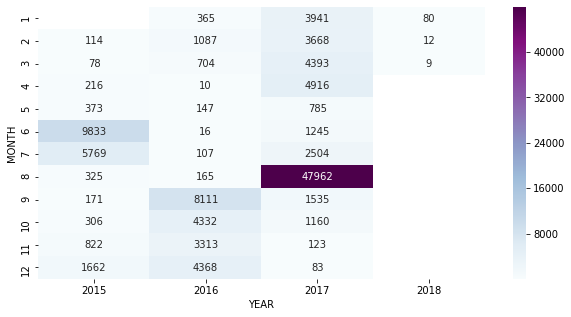

In [62]:
plt.figure(figsize=(10,5))
sns.heatmap(chron,annot=True,fmt='g', cmap='BuPu')

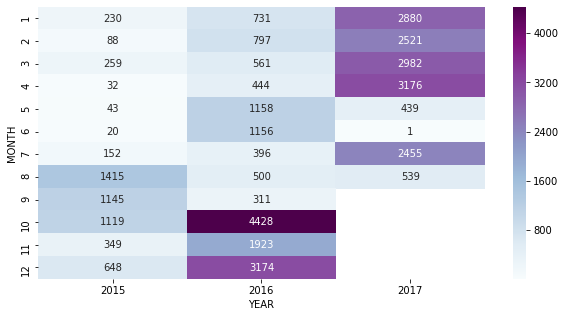

In [63]:
plt.figure(figsize=(10,5))
sns.heatmap(chron1,annot=True,fmt='g', cmap='BuPu')

In [64]:
rightTroll_text = rightTroll_data[(rightTroll_data['language']=='English') | (rightTroll_data['language']=='Russian')]

In [48]:
rightTroll_text = rightTroll_text[['content','language']]

In [49]:
rightTroll_text_df = rightTroll_text.sort_values(['language'])
#rightTroll_text_df

In [50]:
rightTrolltext_list = rightTroll_text_df.values.tolist()
#rightTrolltext_list

In [51]:
ind_russian = []
ind_english = []

for i in range(len(rightTrolltext_list)):
    if rightTrolltext_list[i][1]=='Russian':
        ind_russian.append(i)
    else :
        ind_english.append(i)

In [52]:
#(1) filtering hyperlinks and 
#(2) remove numbers and convert text into lowercase
#(3) separate emojis from text. create a list of set of emojis, each set represents the emojis in its respective locations tweet 
#(4) identifying '#' and creating a list of hashtag words
#(5) sentence into words
#(6) filtering punctuations
#(7) stop-words for english and russian tweets

In [53]:
%%time
rightTrolltext_h = []
emoji_list = []
hashtags_list = []
punch = string.punctuation
stop_words_e = stopwords.words('english')
stop_words_r = stopwords.words('russian')

for i in range(len(rightTrolltext_list)):
    
    # (1)
    tweet = re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', rightTrolltext_list[i][0], flags=re.MULTILINE)

    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    # (2)
    tweet = re.sub(r'\d+', '', tweet)
    tweet = tweet.lower()

    # (3)
    emoji_set = demoji.findall(tweet)
    emoji_list.append(emoji_set)
    
    # (4)
    hastags_per_tweet = re.findall('\#(\w*)',tweet)
    hashtags_list.append(hastags_per_tweet)
    
    # (5)
    tweet = TreebankWordTokenizer().tokenize(tweet)
    tweet.sort()
    
    # (6)
    tweet = [words for words in tweet if words not in punch]
    
    # (7)
    if i<len(ind_english):
        tweet = [words for words in tweet if words not in stop_words_e]
    else:
        tweet = [words for words in tweet if words not in stop_words_r]
    
    rightTrolltext_h.append(tweet)

Wall time: 1min 1s


In [31]:
emoji_list

{}

In [32]:
hashtags_list

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


In [29]:
rightTrolltext_h

[['barely',
  'corruption',
  'democrat',
  'heard',
  'mainstream',
  'media',
  'nedryun',
  'peep',
  'senator',
  'sitting',
  'trial',
  'us',
  'youve'],
 ['correct', 'govt', 'na', 'nogunsforcriminals', 'wan'],
 ['house',
  'legalized',
  'need',
  'nogunsforcriminals',
  'petition',
  'still',
  'urgently',
  'white',
  '’'],
 ['apparently',
  'better',
  'change',
  'everything',
  'isnit',
  'moment',
  'nogunsforcriminals',
  'thing'],
 ['areas', 'black', 'guncontrol', 'must', 'nogunsforcriminals'],
 ['allwentwrongwhen', 'hook', 'nailing', 'picture', 'tried'],
 ['allwentwrongwhen', 'fishing', 'went'],
 ['allwentwrongwhen', 'driving', 'got', 'license'],
 ['anitadwhite',
  'help',
  'naft',
  'nogunsforcriminals',
  'think',
  'us',
  'waynedrake'],
 ['ghettos', 'guns', 'nogunsforcriminals', 'petition', 'sign'],
 ['black',
  'ceiling',
  'door',
  'feels',
  'happy',
  'man',
  'next',
  'nogunsforcriminals',
  'pops',
  'stupid'],
 ['acquisition', 'guns', 'need', 'nogunsforcri